In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from funciones_EDA import *

In [2]:
df_malaga = pd.read_csv("../data/dataset_viajeros_procesado.csv", encoding= "latin1", sep= ";")
df_malaga.drop(columns="Unnamed: 0", inplace=True)

    RECAPITULEMOS ANTES DE EMPEZAR:
- Nuestra variable directora es **PAIS_ORIGEN**, seguida de **TURISTAS**. Estas dos variables las vamos a comprar entre sí y con el resto.
- MES y TEMPORADA son muy similares (temporada nace del mes al que se corresponde el registro), por lo que MES apenas la analizaremos.
- Lo mismo ocurre con TURISTAS y PERNOCTACIONES. Las compararemos entre sí, pero ya podemos imaginar que van de la mano: a mayor núm de turistas, mayor núm de pernoctaciones
- Daremos prioridad al análisis con TURISTAS sobre el análisis con PERNOCTACIONES
- Ciudado con la variable ESTANCIA_MEDIA, puede ser interesente pero no olvidemos que es de tendencia central, de modo que no refleja la totalidad de los datos: núm pernoctaciones correspondiente a cada turista (distinción que por cierto no tenemos)

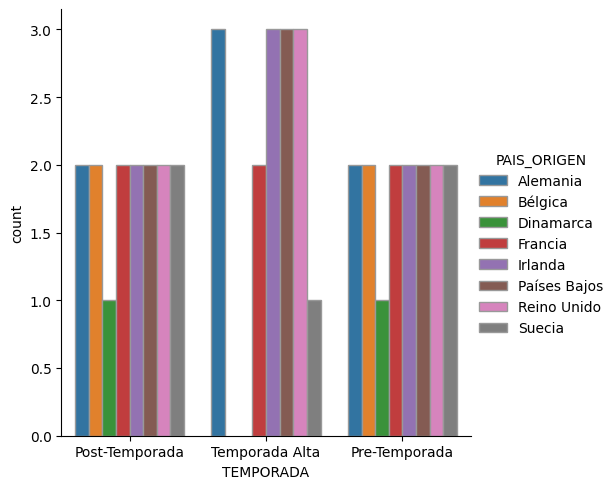

In [3]:
# ANÁLISIS BIVARIANTE CATEGÓRICAS 'TEMPORADA' y 'PAIS_ORIGEN':

sns.catplot(x="TEMPORADA",
            hue="PAIS_ORIGEN", 
            kind="count", 
            edgecolor=".6",
            orient = "V",
            data = df_malaga.sort_values("PAIS_ORIGEN"));

- Esta gráfica contiene demasiada información, pero ya podemos ver cómo Irlanda, Países Bajos, Alemania y Reino Unido destacan entre los turistas que más nos visitan, mismo resultado que obtuvimos al sacar la moda.
- 'MES' contiene todavía más categorías (además de proporcionar casi la misma info que TEMPORADA), por lo que NO vamos a hacer el análisis bivariante de MES y PAIS_ORIGEN ni tampoco de MES y TEMPORADA. 

Text(0.5, 1.0, 'Pernoctaciones en función del registro de turistas')

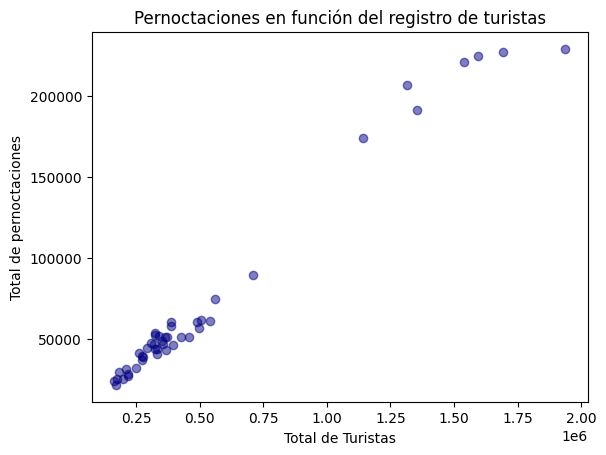

In [4]:
# ANÁLISIS BIVARIANTE ENTRE NUMÉRICAS:

# Veamos cómo el registro de total de turistas afecta a las pernoctaciones sobre el dataset completo:

plt.scatter(df_malaga.PERNOCTACIONES, df_malaga.TURISTAS, c = "navy", alpha= 0.5)
plt.xlabel("Total de Turistas")
plt.ylabel("Total de pernoctaciones")
plt.title("Pernoctaciones en función del registro de turistas")

In [5]:
# Vamos a aplicar el test de pearson para corroborar que ambas variables están relacionadas:

from scipy.stats import pearsonr

pearsonr(df_malaga["PERNOCTACIONES"], df_malaga["TURISTAS"])

PearsonRResult(statistic=np.float64(0.9892139934160974), pvalue=np.float64(1.6418613972570918e-37))

- Visualmente ya se puede apreciar una fuerte correlación positiva entre las variables numéricas, lo cual es lógico: a mayor número de turistas mayor número de total de pernoctaciones.
- TRAS APLICAR EL TEST DE PEARSON: Estableciendo el umbral de correlación en el 0.05, observamos que el p-value obtenido está muy por debajo, por lo que podemos afirmar rotundamente que ambas variables están fuertemente relacionadas; o dicho de otro modo, podemos refutar la hipótesis nula 'las dos variables son independientes'. 

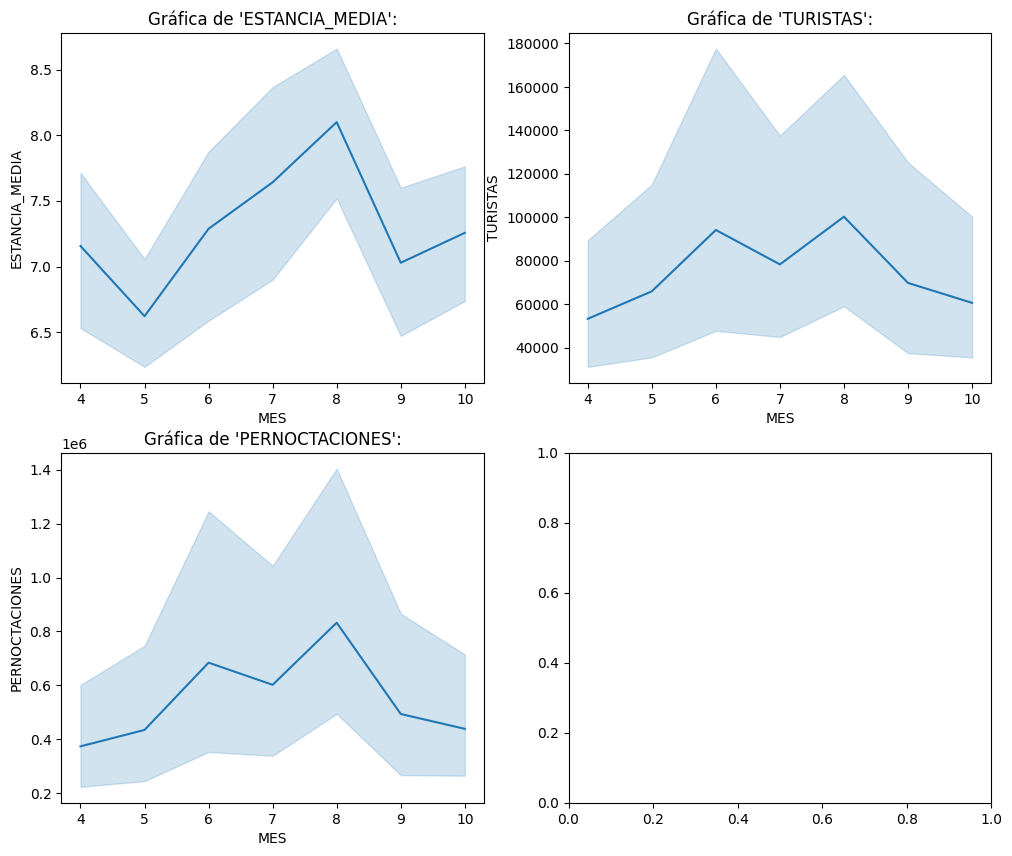

In [6]:
# Función de mi módulo Funciones_EDA

pinta_secuencia_temporal(df_malaga, ["ESTANCIA_MEDIA","TURISTAS","PERNOCTACIONES"])

- Sorprendentemente, observamos en "TURISTAS" y en "PERNOCTACIONES" un descenso en el mes de Julio, estando el pico máximo en Junio y Agosto.
- Esto se puede explicar con la gráfica de "ESTANCIA_MEDIA", pues ésta llega a su pico máximo entre Julio y Agosto. La estancia de los viajeros es más larga en el mes de Julio, lo que puede  significar que hay menos registros de entrada ya que los clientes ya se encuentran en la provincia.
- Por otra parte, observamos como tanto en TURISTAS como en PERNOCTACIONES los meses pre-temporada (Abril y Mayo) y post-temporada (Septiembre y Octubre), son muy similares.

In [7]:
# Proseguimos con el análisis bivariante: DIAGRAMA DE BARRAS entre "PAIS_ORIGEN" y "TURISTAS"; 
# para ello, nos interesa sumar los registros de los países que se repitan una vez los hayamos agrupado:

malaga = df_malaga.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga  # utilizaremos este dataframe groupby para el diagrama de barras

,PAIS_ORIGEN,TURISTAS
0,Alemania,341545.0
1,Bélgica,102341.0
2,Dinamarca,48658.0
3,Francia,306942.0
4,Irlanda,394772.0
5,Países Bajos,369142.0
6,Reino Unido,1472554.0
7,Suecia,172368.0


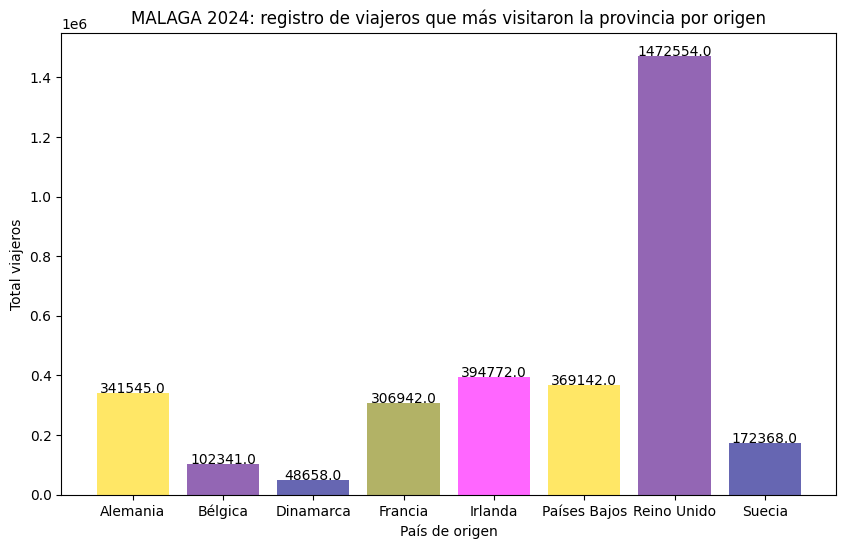

In [8]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga.PAIS_ORIGEN.value_counts().index.to_list()        # Pasamos a una lista la posición de aparición de frecuencias asociadas a los países de origen
frecuencia = top_malaga["TURISTAS"].to_list()                             # Lista de valores absolutos de turistas

ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,1550000)
ax.set_title("MALAGA 2024: registro de viajeros que más visitaron la provincia por origen")
ax.set_xlabel("País de origen")
ax.set_ylabel("Total viajeros")  

for i in range (8):
    ax.text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")

- Reino Unido es de lejos el país que más viajó a Málaga en 2024. La diferencia con el segundo puesto (ocupado por Irlanda, Países Bajos y Alemania es abismal)
- Será interesante ver en el análisis multivariante si estos datos se mantienen en función de las temporadas.

In [9]:
# ANÁLISIS BIVARIANTE: DIAGRAMA DE BARRAS entre "TEMPORADA" y "TURISTAS"; 
# para ello, nos interesa sumar los registros de cada temporada por separado una vez agrupadas:

malaga = df_malaga.groupby(["TEMPORADA"])["TURISTAS"].sum()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga  

,TEMPORADA,TURISTAS
0,Post-Temporada,973216.0
1,Pre-Temporada,887411.0
2,Temporada Alta,1347695.0


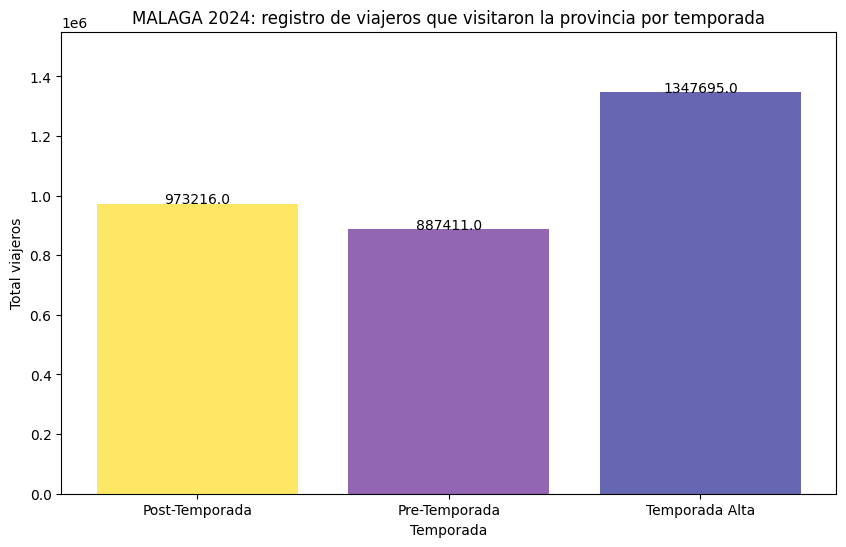

In [10]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga.TEMPORADA.value_counts().index.to_list()        
frecuencia = top_malaga["TURISTAS"].to_list()                             

ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,1550000)
ax.set_title("MALAGA 2024: registro de viajeros que visitaron la provincia por temporada")
ax.set_xlabel("Temporada")
ax.set_ylabel("Total viajeros")  

for i in range (3):
    ax.text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")

- Como era de esperar, en temporada alta encontramos el mayor número de registro de turistas. 
- La pre y post temporada no está nada mal, nuestro objetivo es aumentar estas cifras.

In [11]:
# ANÁLISIS BIVARIANTE: DIAGRAMA DE BARRAS entre "TEMPORADA" y "ESTANCIA_MEDIA"; 
# para ello, nos interesa obtener la media los registros por temporada una vez agrupadas:

malaga = df_malaga.groupby(["TEMPORADA"])["ESTANCIA_MEDIA"].mean()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga  

,TEMPORADA,ESTANCIA_MEDIA
0,Post-Temporada,7.150000
1,Pre-Temporada,6.906667
2,Temporada Alta,7.700000


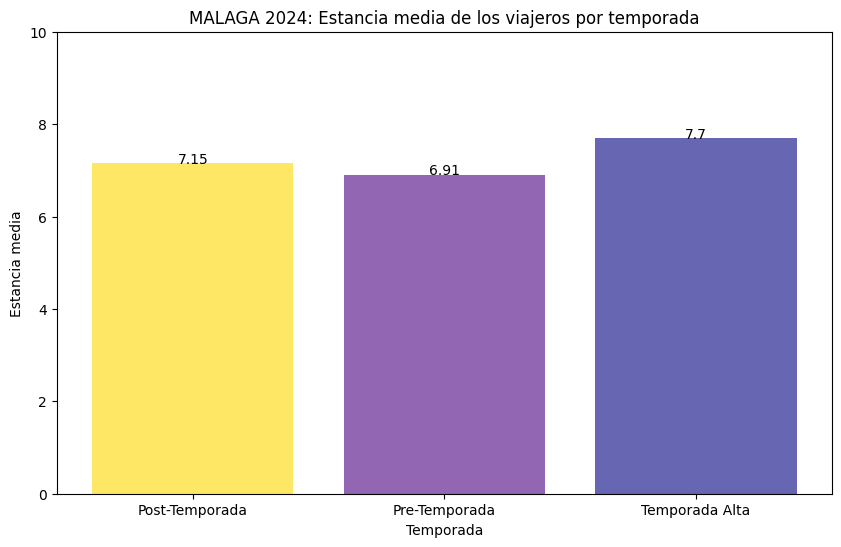

In [12]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga.TEMPORADA.value_counts().index.to_list()        
frecuencia = top_malaga["ESTANCIA_MEDIA"].to_list()                            
ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,10)
ax.set_title("MALAGA 2024: Estancia media de los viajeros por temporada")
ax.set_xlabel("Temporada")
ax.set_ylabel("Estancia media")  

for i in range (3):
    ax.text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")

- No hay gran diferencia en la media de estancia según la temporada, aunque es cierto que en temporada alta los clientes tienden a hospedarse más tiempo.
- Como siempre, cuidado con las tendencias centrales. No tenemos los datos de cuánto tiempo se ha quedado cada turista así que no podemos indagar más.

In [13]:
# ANÁLISIS BIVARIANTE: DIAGRAMA DE BARRAS entre "PAIS_ORIGEN" y "ESTANCIA_MEDIA"; 
# para ello, nos interesa obtener la media los registros por país de origen una vez agrupadas:

malaga = df_malaga.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga  

,PAIS_ORIGEN,ESTANCIA_MEDIA
0,Alemania,8.185714
1,Bélgica,7.350000
2,Dinamarca,8.000000
3,Francia,7.200000
4,Irlanda,7.528571
5,Países Bajos,6.628571
6,Reino Unido,6.364286
7,Suecia,7.360000


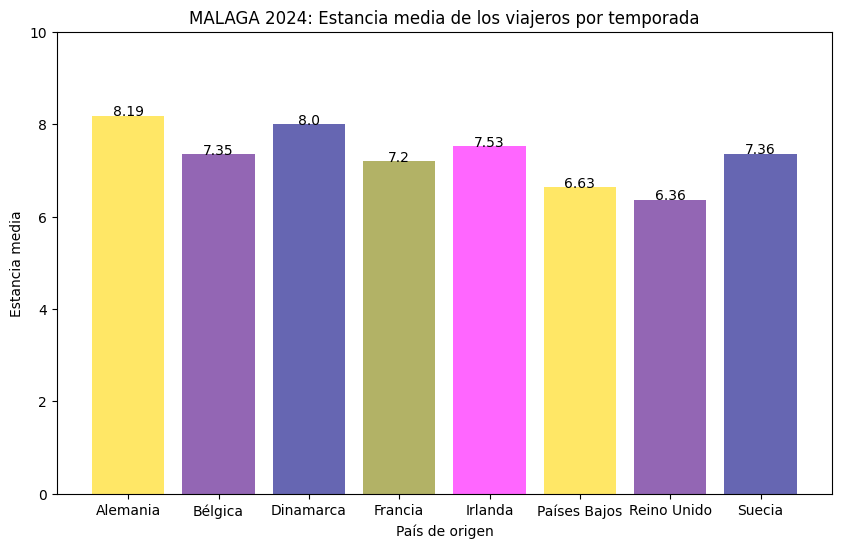

In [14]:
fig, ax = plt.subplots(figsize=(10,6)) 

categorias = top_malaga.PAIS_ORIGEN.value_counts().index.to_list()        
frecuencia = top_malaga["ESTANCIA_MEDIA"].to_list()                            
ax.bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax.set_ylim(0,10)
ax.set_title("MALAGA 2024: Estancia media de los viajeros por temporada")
ax.set_xlabel("País de origen")
ax.set_ylabel("Estancia media")  

for i in range (8):
    ax.text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")

- Llama la atención cómo Reino unido, siendo el país con más registro de turistas, es el que menos días de media se queda en Málaga. Esto se puede explicar precisamente por el gran número de viajeros que visitan la provincia, ya que muchos de ellos puede que se queden menos de 3 noches. Al no tener estos datos disponibles, no podemos saber mucho más.
- También llama la atención que países con menor presencia de turistas sean los que mayor tiempo de media se queden en Málaga (por ejemplo: Dinamarca, Suecia, Bélgica)